# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression
import random
random.seed(10)

In [2]:
df = pd.read_csv('last_csv.csv',index_col=[0])

# Acquire
> * Data acquired from:
    - https://overthecap.com/position/quarterback
    - https://overthecap.com/contract-history/quarterback
    - https://nextgenstats.nfl.com/stats/passing/2022/REG/all#yards
    - https://www.pro-football-reference.com/years/2022/passing.htm
> * Combined multiple csv's and added additionals column to give percentage of wins and losses
> * Cached combined file to local csv
> * Each row player stats throughout a specific year

# Prepare
> * Visualized full dataset for univariate exploration
      * Histograms different types of distributions

> * Verified datatypes
> * Corrected column names
> * Checked for nulls and removed them
> * Split the data, stratifying on target variable

In [3]:
df.head()

team  year  games_played   comp    att  comp_pct     yds  \
name                                                                      
Blaine Gabbert  JAX  2011          15.0  210.0  413.0      50.8  2214.0   
Blaine Gabbert  JAX  2012          10.0  162.0  278.0      58.3  1662.0   
Blaine Gabbert   SF  2015           8.0  178.0  282.0      63.1  2031.0   
Blaine Gabbert   SF  2016           6.0   91.0  160.0      56.9   925.0   
Blaine Gabbert  ARI  2017           5.0   95.0  171.0      55.6  1086.0   

                avg_yds_per_att    td   int  ...  loss  wild_card  div_rnd  \
name                                         ...                             
Blaine Gabbert              5.4  12.0  11.0  ...    10        0.0      0.0   
Blaine Gabbert              6.0   9.0   6.0  ...     9        0.0      0.0   
Blaine Gabbert              7.2  10.0   7.0  ...     5        0.0      0.0   
Blaine Gabbert              5.8   5.0   6.0  ...     4        0.0      0.0   
Blaine Gabbert              6.4   6.0   6.0  ...     3        0.0      0.0   

                conf_rnd  superbowl superbowl_win  win_perc  loss_perc  \
name                                                                     
Blaine Gabbert       0.0        0.0           0.0      0.27       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.10       0.90   
Blaine Gabbert       0.0        0.0           0.0      0.38       0.62   
Blaine Gabbert       0.0        0.0           0.0      0.17       0.67   
Blaine Gabbert       0.0        0.0           0.0      0.40       0.60   

               td_per_game  sk_per_game  
name                                     
Blaine Gabbert        0.80         2.67  
Blaine Gabbert        0.90         2.20  
Blaine Gabbert        1.25         3.12  
Blaine Gabbert        0.83         1.83  
Blaine Gabbert        1.20         4.60  

[5 rows x 41 columns]

In [4]:
train, validate, test = wrangle.split_data(df)
columns_list, target, corr_test = wrangle.get_target_and_columns(df, train)

# Univariate Analysis

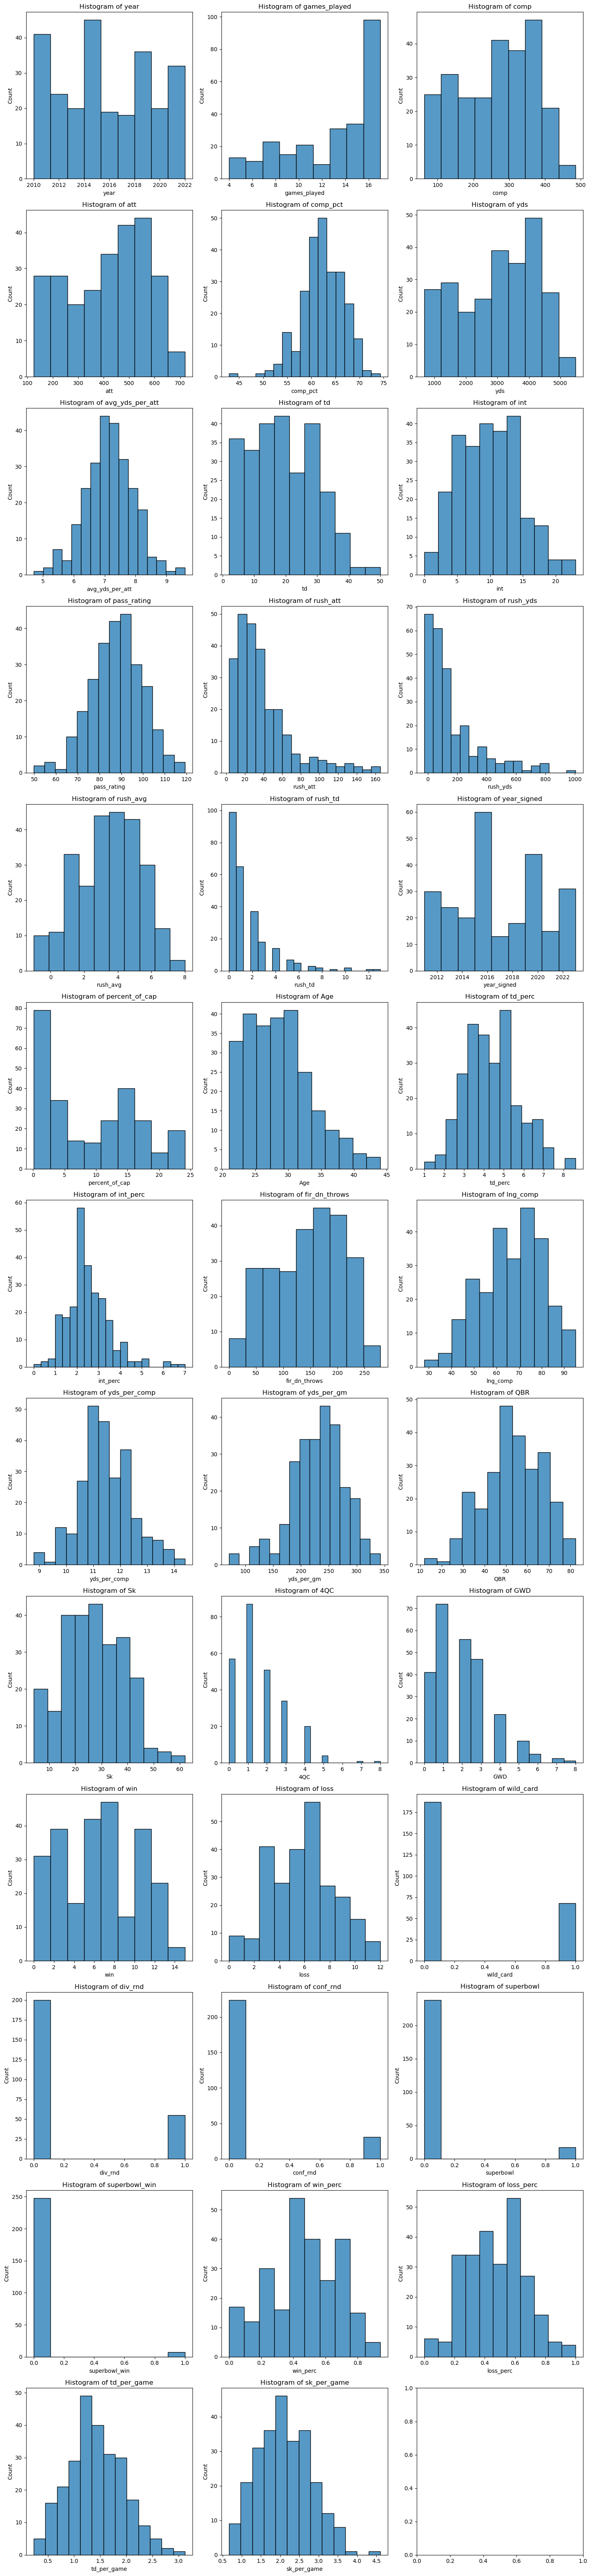

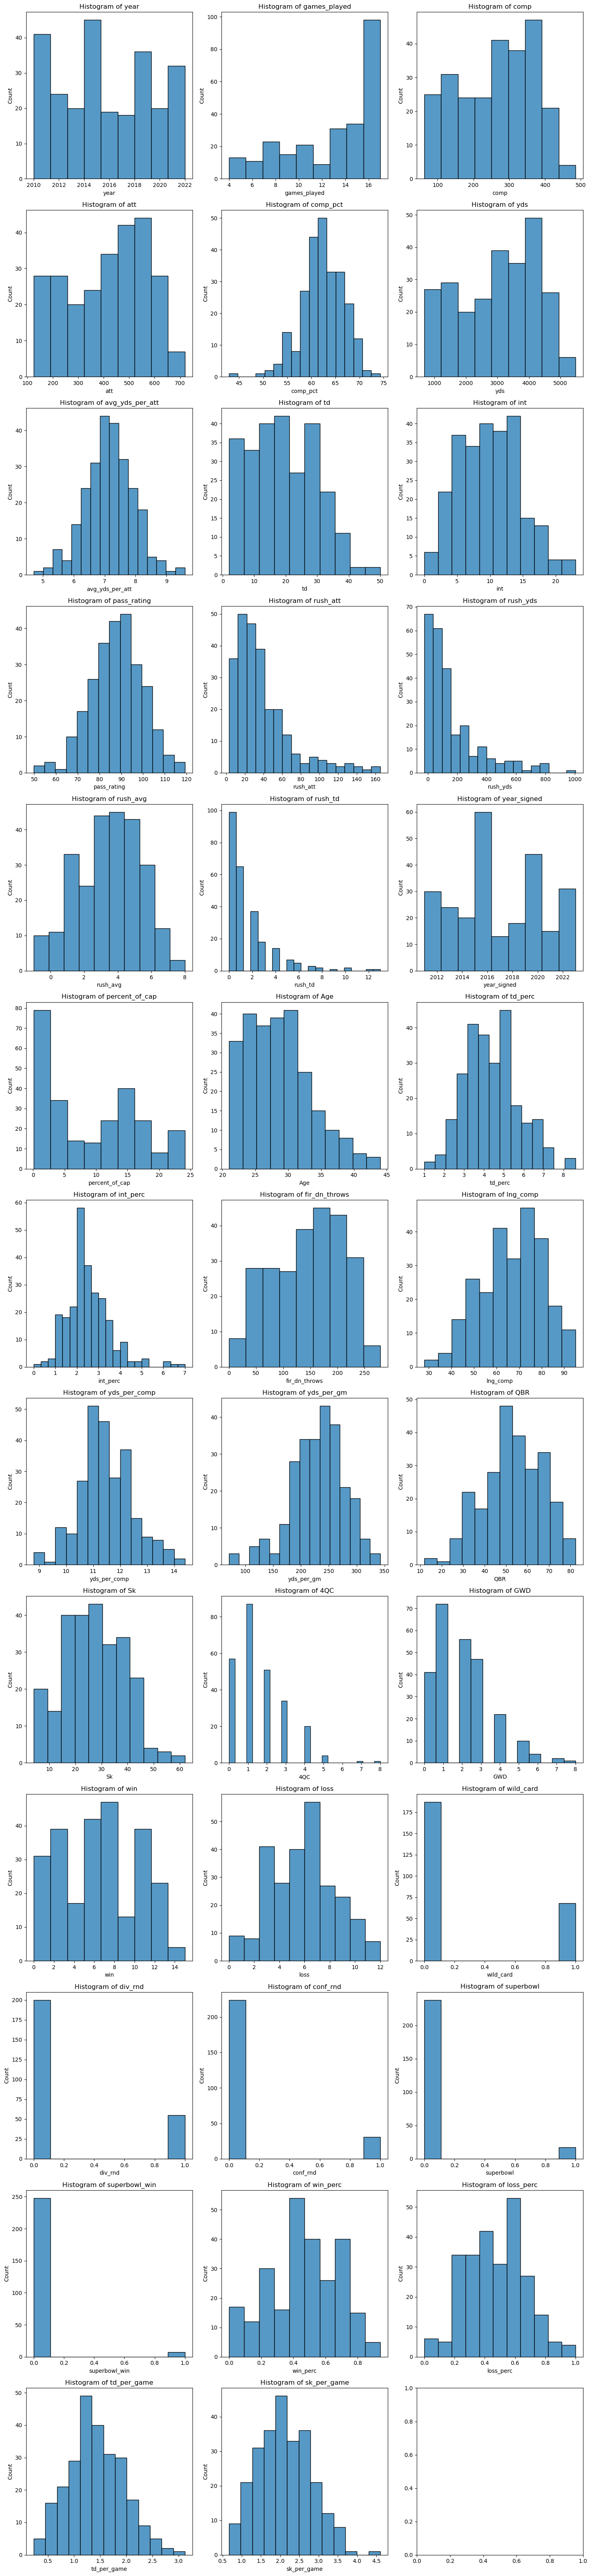

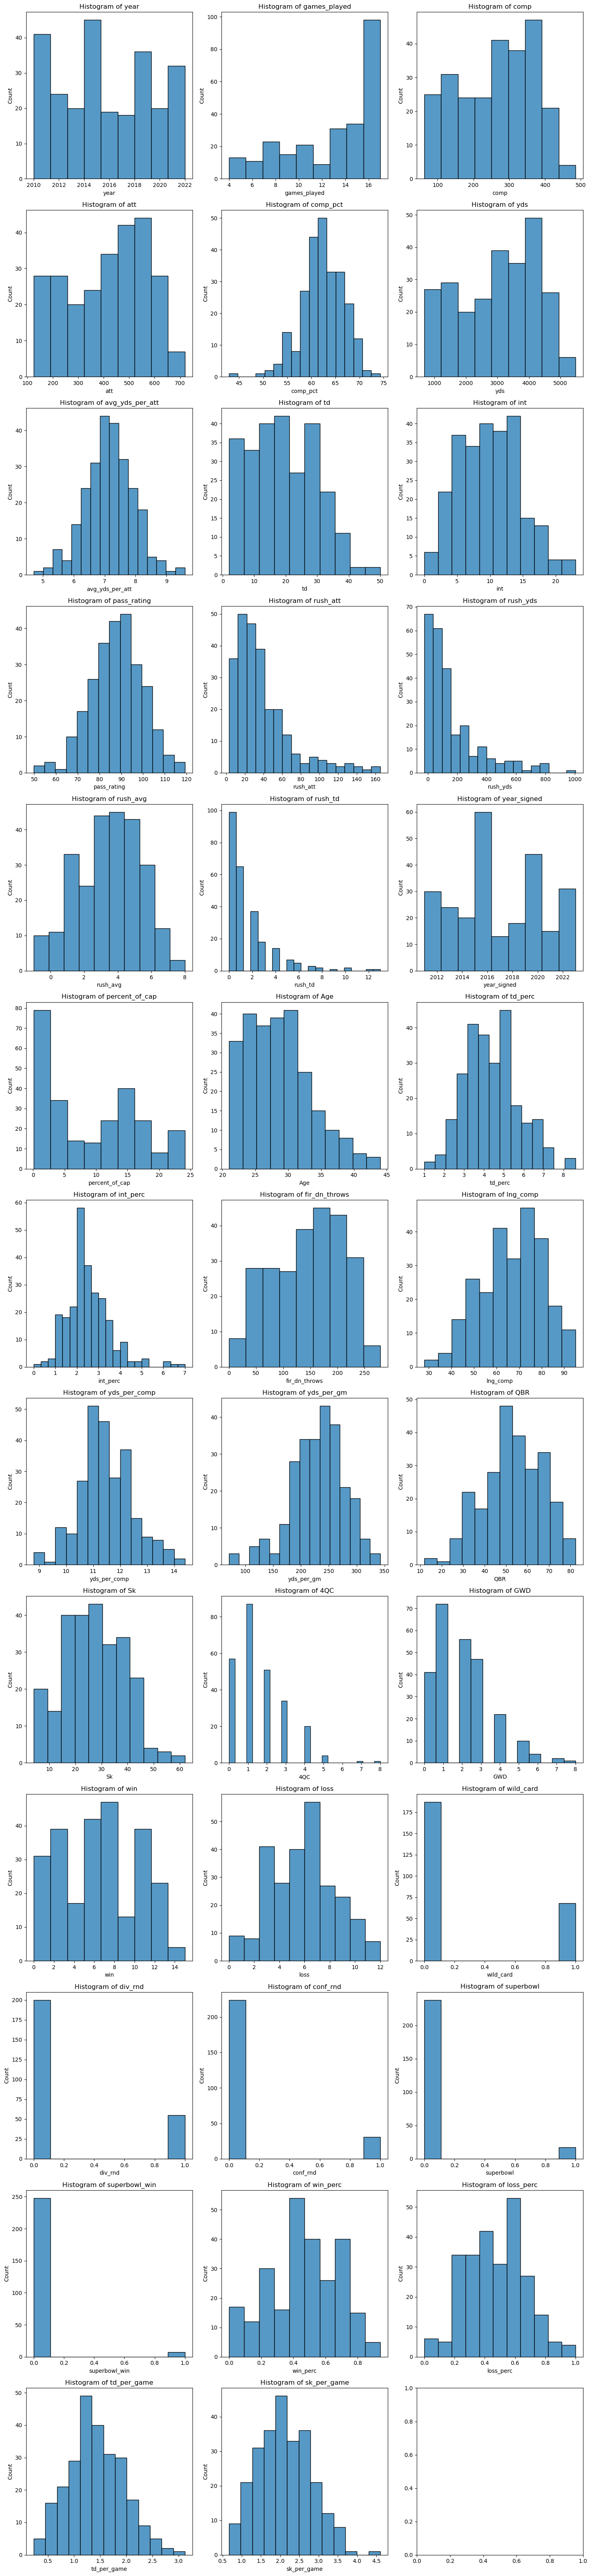

In [5]:
wrangle.new_visual_univariate_findings(train)

In [6]:
wrangle.univariate_findings()

Feature           Distribution
0      games_played            left_skewed
1              comp  non-symmetric bimodal
2               att  non-symmetric bimodal
3          comp_pct               normally
4               yds  non-symmetric bimodal
5   avg_yds_per_att               normally
6                td           right-skewed
7               int           right-skewed
8       pass_rating               normally
9          rush_att           right-skewed
10         rush_yds           right-skewed
11         rush_avg               normally
12          rush_td           right-skewed
13              age           right-skewed
14          td_perc               normally
15         int_perc  non-symmetric bimodal
16    fir_dn_throws  non-symmetric bimodal
17         Lng_comp               normally
18     yds_per_comp               normally
19       yds_per_gm               normally
20              QBR               normally
21               sk               normally
22              4QC           right-skewed
23              GWD           right-skewed

# Univariate Exploration Summary


# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

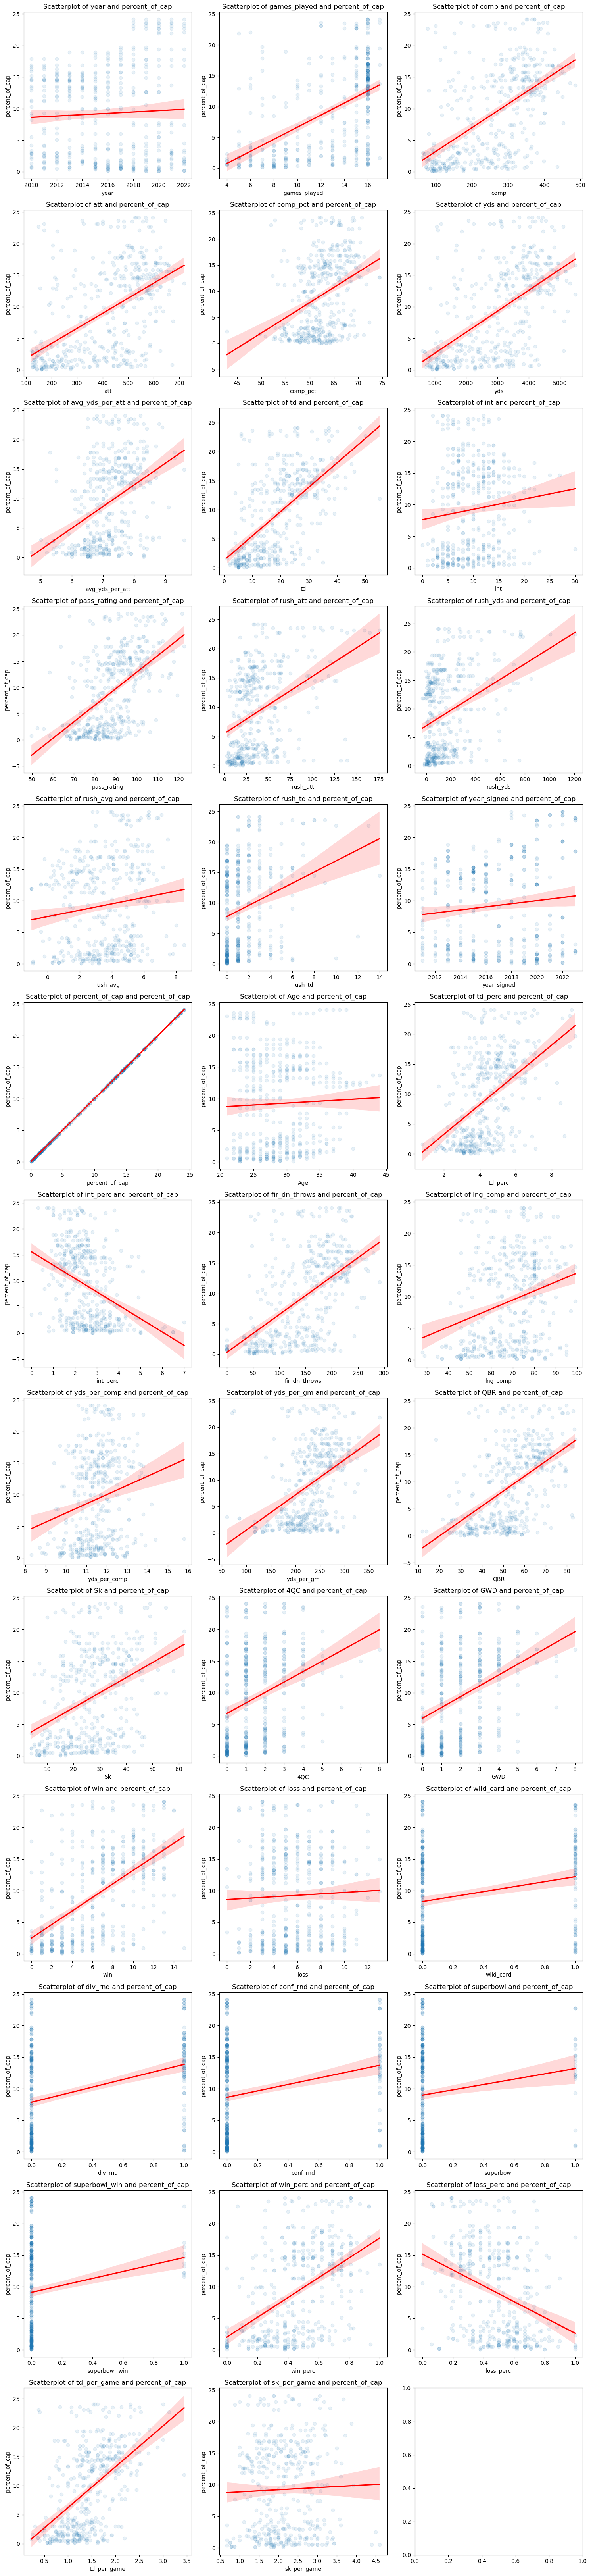

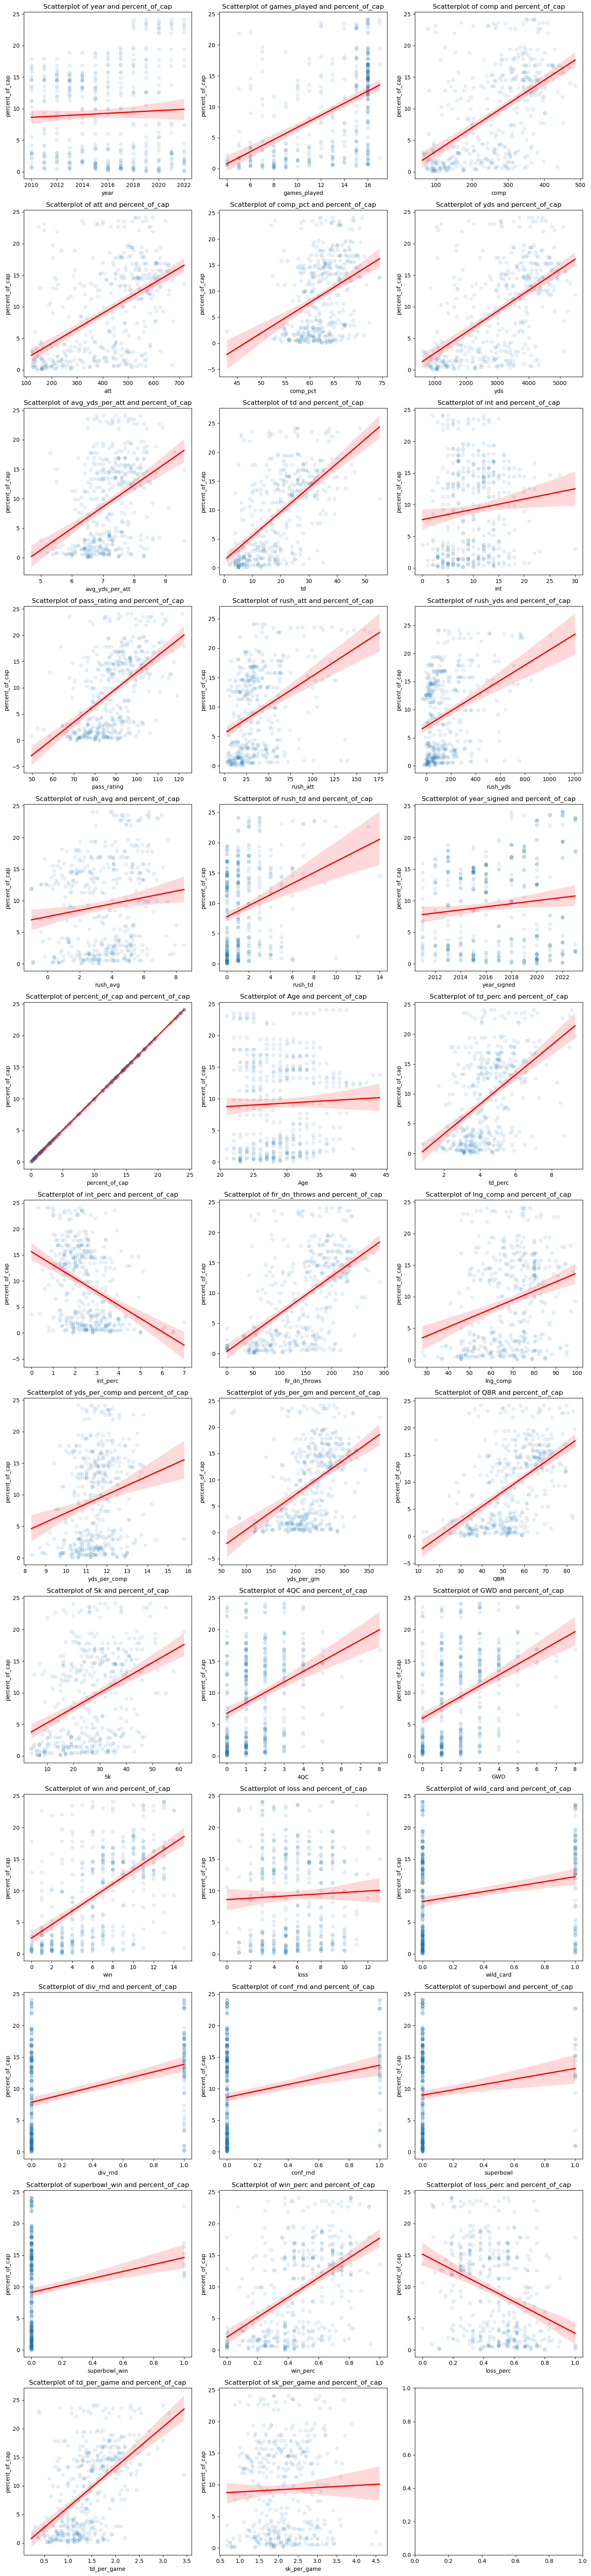

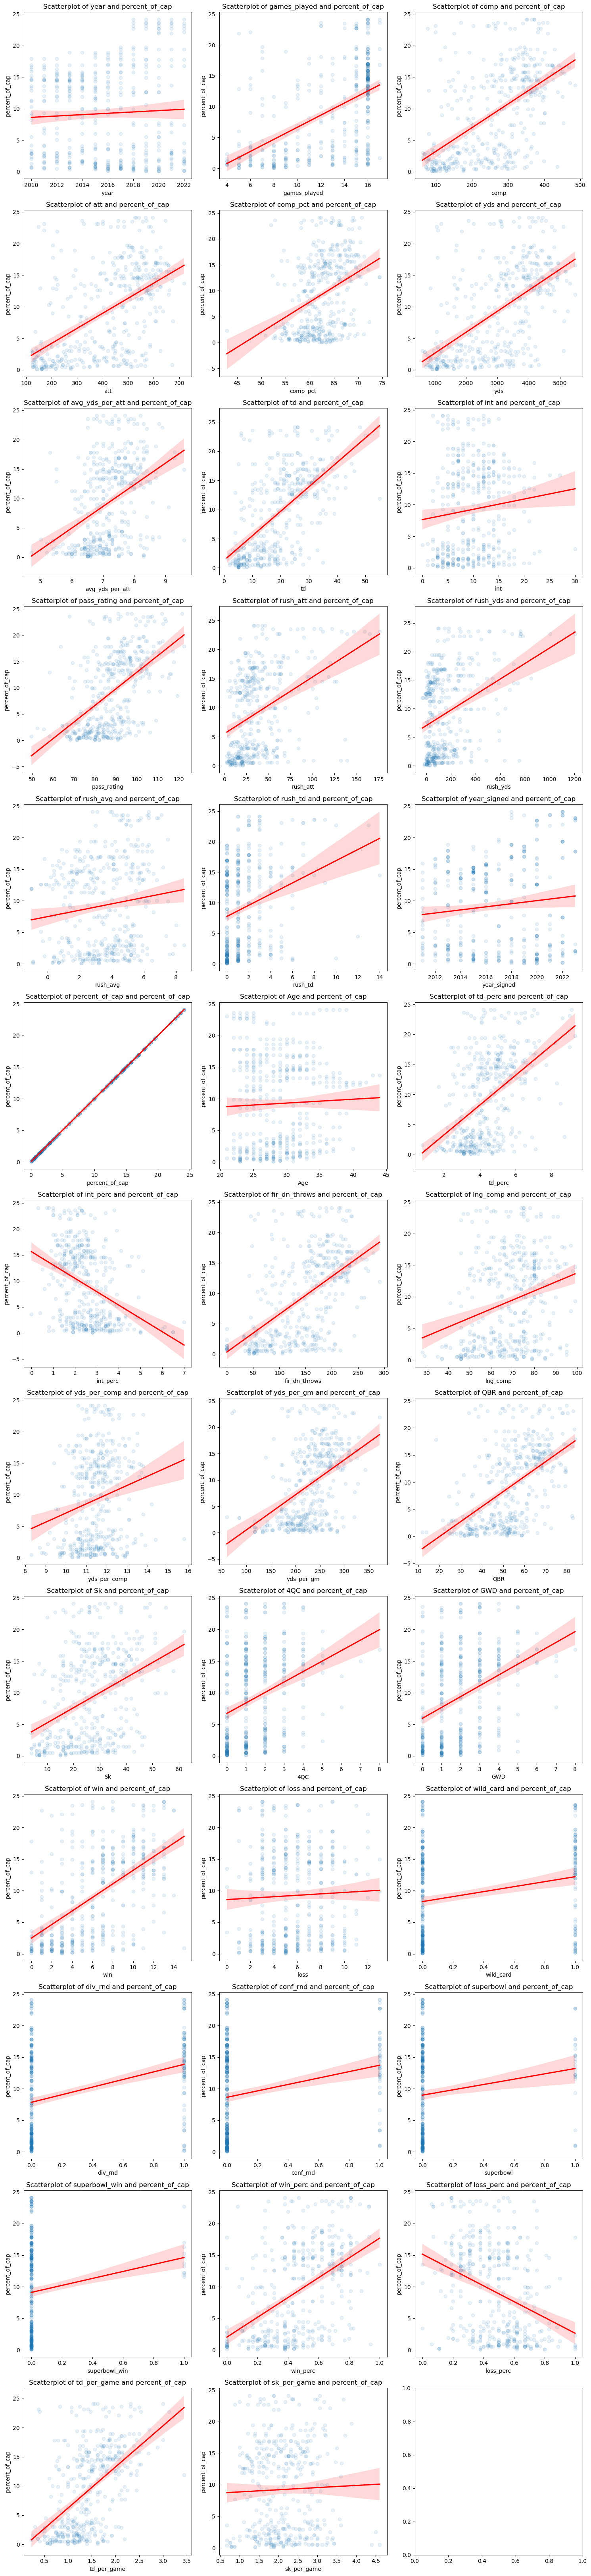

In [7]:
wrangle.new_visual_multivariate_findings(df, target)

# Bivariate Exploration Summary


In [8]:
wrangle.get_explore_data(columns_list, corr_test)

Features Correlation Moving Forward
0              year    Positive             No
1      games_played    Positive             No
2              comp    Negative             No
3               att    Positive             No
4          comp_pct    Positive             No
5               yds    Positive            Yes
6   avg_yds_per_att    Positive            Yes
7                td    Positive            Yes
8               int    Positive            Yes
9       pass_rating    Positive            Yes
10         rush_att    Positive            Yes
11         rush_yds    Positive            Yes
12         rush_avg    Positive            Yes
13          rush_td    Positive            Yes
14      year_signed    Positive            Yes
15              Age    Positive            Yes
16          td_perc    Positive            Yes
17         int_perc    Negative            Yes
18    fir_dn_throws    Positive            Yes
19         lng_comp    Positive            Yes
20     yds_per_comp    Positive            Yes
21       yds_per_gm    Positive            Yes
22              QBR    Positive            Yes
23               Sk    Negative            Yes
24              4QC    Positive            Yes
25              GWD    Positive            Yes
26              win    Positive            Yes
27             loss    Positive            Yes
28        wild_card    Positive            Yes
29          div_rnd    Positive            Yes
30         conf_rnd    Positive            Yes
31        superbowl    Positive            Yes
32    superbowl_win    Positive            Yes
33         win_perc    Positive            Yes
34        loss_perc    Positive            Yes
35      td_per_game    Positive            Yes
36      sk_per_game    Positive            Yes

# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [9]:
corr_test.sort_values(by= 'p')

feature         r             p          target
36               td  0.594521  9.192100e-26  percent_of_cap
35              win  0.585662  7.097548e-25  percent_of_cap
34              yds  0.562861  1.035786e-22  percent_of_cap
33              QBR  0.557755  3.001540e-22  percent_of_cap
32    fir_dn_throws  0.547087  2.615286e-21  percent_of_cap
31             comp  0.535583  2.480017e-20  percent_of_cap
30      pass_rating  0.531911  4.994622e-20  percent_of_cap
29     games_played  0.522319  2.988998e-19  percent_of_cap
28         win_perc  0.517915  6.669137e-19  percent_of_cap
27      td_per_game  0.507533  4.228042e-18  percent_of_cap
26              att  0.505884  5.636826e-18  percent_of_cap
25          td_perc  0.483930  2.245064e-16  percent_of_cap
24         rush_att  0.430713  6.101038e-13  percent_of_cap
23        loss_perc -0.420144  2.506024e-12  percent_of_cap
22  avg_yds_per_att  0.414472  5.242529e-12  percent_of_cap
21       yds_per_gm  0.408625  1.106024e-11  percent_of_cap
20         rush_yds  0.400493  3.050384e-11  percent_of_cap
19              GWD  0.395678  5.490926e-11  percent_of_cap
18         comp_pct  0.365446  1.783223e-09  percent_of_cap
17         int_perc -0.363479  2.209347e-09  percent_of_cap
16              4QC  0.344669  1.595279e-08  percent_of_cap
15               Sk  0.341969  2.096650e-08  percent_of_cap
14          div_rnd  0.327848  8.394938e-08  percent_of_cap
13          rush_td  0.287115  3.149233e-06  percent_of_cap
12        wild_card  0.273547  9.355935e-06  percent_of_cap
11         conf_rnd  0.239728  1.106946e-04  percent_of_cap
10         lng_comp  0.238663  1.190020e-04  percent_of_cap
9      yds_per_comp  0.232316  1.819138e-04  percent_of_cap
8          rush_avg  0.192752  1.988594e-03  percent_of_cap
7       year_signed  0.179601  4.010441e-03  percent_of_cap
6         superbowl  0.163050  9.096846e-03  percent_of_cap
5     superbowl_win  0.131695  3.556875e-02  percent_of_cap
4               int  0.116294  6.370407e-02  percent_of_cap
3              year  0.112777  7.220931e-02  percent_of_cap
2              loss -0.034549  5.828954e-01  percent_of_cap
1               Age  0.018158  7.729192e-01  percent_of_cap
0       sk_per_game  0.004508  9.428889e-01  percent_of_cap

In [10]:
columns_list = corr_test.feature[corr_test.p < .05].to_list()

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with

In [11]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

feature         r             p          target
0                td  0.594521  9.192100e-26  percent_of_cap
1               win  0.585662  7.097548e-25  percent_of_cap
2               yds  0.562861  1.035786e-22  percent_of_cap
3               QBR  0.557755  3.001540e-22  percent_of_cap
4     fir_dn_throws  0.547087  2.615286e-21  percent_of_cap
5              comp  0.535583  2.480017e-20  percent_of_cap
6       pass_rating  0.531911  4.994622e-20  percent_of_cap
7      games_played  0.522319  2.988998e-19  percent_of_cap
8          win_perc  0.517915  6.669137e-19  percent_of_cap
9       td_per_game  0.507533  4.228042e-18  percent_of_cap
10              att  0.505884  5.636826e-18  percent_of_cap
11          td_perc  0.483930  2.245064e-16  percent_of_cap
12         rush_att  0.430713  6.101038e-13  percent_of_cap
13        loss_perc -0.420144  2.506024e-12  percent_of_cap
14  avg_yds_per_att  0.414472  5.242529e-12  percent_of_cap
15       yds_per_gm  0.408625  1.106024e-11  percent_of_cap
16         rush_yds  0.400493  3.050384e-11  percent_of_cap
17              GWD  0.395678  5.490926e-11  percent_of_cap
18         comp_pct  0.365446  1.783223e-09  percent_of_cap
19         int_perc -0.363479  2.209347e-09  percent_of_cap
20              4QC  0.344669  1.595279e-08  percent_of_cap
21               Sk  0.341969  2.096650e-08  percent_of_cap
22          div_rnd  0.327848  8.394938e-08  percent_of_cap
23          rush_td  0.287115  3.149233e-06  percent_of_cap
24        wild_card  0.273547  9.355935e-06  percent_of_cap
25         conf_rnd  0.239728  1.106946e-04  percent_of_cap
26         lng_comp  0.238663  1.190020e-04  percent_of_cap
27     yds_per_comp  0.232316  1.819138e-04  percent_of_cap
28         rush_avg  0.192752  1.988594e-03  percent_of_cap
29      year_signed  0.179601  4.010441e-03  percent_of_cap
30        superbowl  0.163050  9.096846e-03  percent_of_cap
31    superbowl_win  0.131695  3.556875e-02  percent_of_cap

In [12]:
# splitting the data in its respective catagory
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

In [13]:
# Scaling on selected features to be sent into model
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

In [14]:
# Running the data through the models
df1, df2, df3,predict_linear  = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [15]:
train['predicted'] = predict_linear.tolist()

# Looking at predicted vs actual for a given year

In [16]:
pd.set_option('display.max_rows', None)
train[['predicted','percent_of_cap', 'year']].sort_values(by=['percent_of_cap','year'], ascending = False)

predicted  percent_of_cap  year
name                                               
Aaron Rodgers       14.359266            24.1  2019
Josh Allen          22.133373            23.6  2021
Josh Allen          19.861049            23.6  2020
Josh Allen          11.465445            23.6  2019
Russell Wilson       9.613331            23.5  2022
Russell Wilson      21.588622            23.5  2020
Russell Wilson      17.888654            23.5  2019
Lamar Jackson       19.118876            23.1  2022
Lamar Jackson       17.576326            23.1  2021
Lamar Jackson       20.812643            23.1  2020
Lamar Jackson       14.397683            23.1  2018
Jalen Hurts         15.811328            22.7  2022
Jalen Hurts         16.553767            22.7  2021
Jalen Hurts         11.379520            22.7  2020
Patrick Mahomes     21.166163            22.7  2020
Patrick Mahomes     20.060151            22.7  2019
Patrick Mahomes     21.733752            22.7  2018
Deshaun Watson       4.905084            22.1  2022
Dak Prescott        15.452412            21.9  2021
Deshaun Watson      18.582879            19.7  2018
Derek Carr          10.304344            19.4  2022
Derek Carr          16.549399            19.4  2021
Derek Carr          13.739646            19.4  2020
Derek Carr          12.481938            19.4  2019
Derek Carr           8.278285            19.4  2017
Aaron Rodgers       10.129463            18.9  2017
Aaron Rodgers        8.865857            18.9  2013
Russell Wilson      15.199258            18.6  2018
Russell Wilson      17.986313            18.6  2017
Russell Wilson      14.594877            18.6  2016
Ben Roethlisberger  12.546874            18.1  2016
Ben Roethlisberger  14.107527            18.1  2015
Aaron Rodgers       13.625605            17.9  2010
Daniel Jones        19.674952            17.8  2022
Daniel Jones        12.926810            17.8  2020
Daniel Jones        11.449697            17.8  2019
Jared Goff           9.535731            17.8  2019
Carson Wentz         6.211923            17.0  2016
Matt Ryan           13.958230            16.9  2017
Matt Ryan           16.988294            16.9  2016
Matt Ryan           15.729857            16.9  2014
Matt Ryan           17.478512            16.9  2012
Matt Ryan           11.074606            16.9  2011
Matt Ryan           11.815243            16.9  2010
Kirk Cousins        14.935171            16.8  2022
Kirk Cousins        14.032792            16.8  2020
Kirk Cousins        12.539926            16.6  2018
Drew Brees          22.274603            16.6  2011
Drew Brees          13.607966            16.6  2010
Joe Flacco           9.391080            16.3  2012
Joe Flacco           9.865113            16.3  2010
Peyton Manning      13.060171            15.9  2010
Dak Prescott        14.187491            15.8  2018
Kirk Cousins        11.070472            15.8  2017
Andrew Luck         16.257749            15.8  2016
Andrew Luck         15.983081            15.8  2014
Andrew Luck         10.643007            15.8  2012
Drew Brees          14.258642            15.6  2015
Drew Brees          13.358821            15.6  2012
Russell Wilson      18.037984            15.3  2013
Russell Wilson      12.991280            15.3  2012
Ben Roethlisberger  14.861382            15.2  2014
Ben Roethlisberger  11.129272            15.2  2013
Ben Roethlisberger  11.309423            15.2  2012
Ben Roethlisberger  10.074819            15.2  2010
Derek Carr          12.486967            15.0  2016
Derek Carr          10.711490            15.0  2015
Ryan Tannehill      14.801360            14.9  2020
Eli Manning         11.610807            14.7  2015
Eli Manning         10.448289            14.7  2014
Eli Manning         10.227186            14.7  2012
Tony Romo           11.236176            14.6  2011
Tony Romo            3.296341            14.6  2010
Philip Rivers       11.284006            14.5  2014
Philip Rivers       15.375867            14.5  2013
Cam Newton      

## Train Data

In [17]:
# Models on the training data
df1

model_train      rmse        r2
0                        baseline  7.378667  0.000000
1     ordinary least squared(OLS)  4.963924  0.547421
2                lasso lars(lars)  7.378667  0.000000
3    Polynomial Regression(poly2)  0.031311  0.999982
4  Generalized Linear Model (GLM)  5.812994  0.379354

## Validate Data

In [18]:
# Models on the validate data
df2

model_validate          rmse            r2
0                        baseline  7.378667e+00  0.000000e+00
1     ordinary least squared(OLS)  5.956893e+00  2.127481e-01
2                lasso lars(lars)  6.819358e+00 -3.171820e-02
3    Polynomial Regression(poly2)  1.035842e+07 -2.380460e+12
4  Generalized Linear Model (GLM)  6.836453e+00 -3.689738e-02

## Test Data

In [19]:
# Model on the unseen test data
df3.iloc[1].reset_index()

index                            1
0  model_validate  ordinary least squared(OLS)
1            rmse                     5.223056
2              r2                     0.475126

# Using fold method for splitting data

In [20]:
# Running the data through the models with the new train, test method.
master_df,best_parameters = wrangle.run_fold(df, columns_list, target)

In [21]:
master_df

alpha fit_intercept verbose      score               model  n_jobs  \
2     1.0         False    True   6.178886                lars     NaN   
3     1.0         False   False   6.178886                lars     NaN   
6     2.0         False    True   6.819021                lars     NaN   
7     2.0         False   False   6.819021                lars     NaN   
0     1.0          True    True   7.261389                lars     NaN   
76   20.0          True    True   7.261389                lars     NaN   
32    9.0          True    True   7.261389                lars     NaN   
33    9.0          True   False   7.261389                lars     NaN   
36   10.0          True    True   7.261389                lars     NaN   
37   10.0          True   False   7.261389                lars     NaN   
73   19.0          True   False   7.261389                lars     NaN   
72   19.0          True    True   7.261389                lars     NaN   
40   11.0          True    True   7.261389                lars     NaN   
41   11.0          True   False   7.261389                lars     NaN   
44   12.0          True    True   7.261389                lars     NaN   
68   18.0          True    True   7.261389                lars     NaN   
69   18.0          True   False   7.261389                lars     NaN   
60   16.0          True    True   7.261389                lars     NaN   
48   13.0          True    True   7.261389                lars     NaN   
49   13.0          True   False   7.261389                lars     NaN   
52   14.0          True    True   7.261389                lars     NaN   
53   14.0          True   False   7.261389                lars     NaN   
65   17.0          True   False   7.261389                lars     NaN   
64   17.0          True    True   7.261389                lars     NaN   
56   15.0          True    True   7.261389                lars     NaN   
57   15.0          True   False   7.261389                lars     NaN   
45   12.0          True   False   7.261389                lars     NaN   
29    8.0          True   False   7.261389                lars     NaN   
77   20.0          True   False   7.261389                lars     NaN   
61   16.0          True   False   7.261389                lars     NaN   
13    4.0          True   False   7.261389                lars     NaN   
12    4.0          True    True   7.261389                lars     NaN   
17    5.0          True   False   7.261389                lars     NaN   
20    6.0          True    True   7.261389                lars     NaN   
16    5.0          True    True   7.261389                lars     NaN   
9     3.0          True   False   7.261389                lars     NaN   
21    6.0          True   False   7.261389                lars     NaN   
5     2.0          True   False   7.261389                lars     NaN   
4     2.0          True    True   7.261389                lars     NaN   
24    7.0          True    True   7.261389                lars     NaN   
25    7.0          True   False   7.261389                lars     NaN   
1     1.0          True   False   7.261389                lars     NaN   
8     3.0          True    True   7.261389                lars     NaN   
28    8.0          True    True   7.261389                lars     NaN   
10    3.0         False    True   7.476365                lars     NaN   
11    3.0         False   False   7.476365                lars     NaN   
15    4.0         False   False   8.287283                lars     NaN   
14    4.0         False    True   8.287283                lars     NaN   
18    5.0         False    True   9.228650                lars     NaN   
19    5.0         False   False   9.228650                lars     NaN   
22    6.0         False    True  10.264181                lars     NaN   
23    6.0         False   False  10.264181                lars     NaN   
26    7.0         False    True  11.367805                lars     NaN   
27    7.

In [22]:
# Running the test data through the models
best_parameters

model_validate      rmse        r2
0          baseline  7.254760  0.000000
1  lasso lars(lars)  5.762313  0.354821

# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 5.479861e+00 in validate
> - Our unseen test data beat baseline

# Conclusion

> - The different columns were distributed in differently see above for a chart

### Features that were statistically significant

In [23]:
corr_test[corr_test.p < .05].sort_values(by='p').reset_index().drop(columns ='index')

feature         r             p          target
0                td  0.594521  9.192100e-26  percent_of_cap
1               win  0.585662  7.097548e-25  percent_of_cap
2               yds  0.562861  1.035786e-22  percent_of_cap
3               QBR  0.557755  3.001540e-22  percent_of_cap
4     fir_dn_throws  0.547087  2.615286e-21  percent_of_cap
5              comp  0.535583  2.480017e-20  percent_of_cap
6       pass_rating  0.531911  4.994622e-20  percent_of_cap
7      games_played  0.522319  2.988998e-19  percent_of_cap
8          win_perc  0.517915  6.669137e-19  percent_of_cap
9       td_per_game  0.507533  4.228042e-18  percent_of_cap
10              att  0.505884  5.636826e-18  percent_of_cap
11          td_perc  0.483930  2.245064e-16  percent_of_cap
12         rush_att  0.430713  6.101038e-13  percent_of_cap
13        loss_perc -0.420144  2.506024e-12  percent_of_cap
14  avg_yds_per_att  0.414472  5.242529e-12  percent_of_cap
15       yds_per_gm  0.408625  1.106024e-11  percent_of_cap
16         rush_yds  0.400493  3.050384e-11  percent_of_cap
17              GWD  0.395678  5.490926e-11  percent_of_cap
18         comp_pct  0.365446  1.783223e-09  percent_of_cap
19         int_perc -0.363479  2.209347e-09  percent_of_cap
20              4QC  0.344669  1.595279e-08  percent_of_cap
21               Sk  0.341969  2.096650e-08  percent_of_cap
22          div_rnd  0.327848  8.394938e-08  percent_of_cap
23          rush_td  0.287115  3.149233e-06  percent_of_cap
24        wild_card  0.273547  9.355935e-06  percent_of_cap
25         conf_rnd  0.239728  1.106946e-04  percent_of_cap
26         lng_comp  0.238663  1.190020e-04  percent_of_cap
27     yds_per_comp  0.232316  1.819138e-04  percent_of_cap
28         rush_avg  0.192752  1.988594e-03  percent_of_cap
29      year_signed  0.179601  4.010441e-03  percent_of_cap
30        superbowl  0.163050  9.096846e-03  percent_of_cap
31    superbowl_win  0.131695  3.556875e-02  percent_of_cap

### NLP Insights

In [24]:
import w_wrangle as wran

In [25]:
#Acquire and Prepare

comm = wran.acquire_commentary()
comm.player_commentary = comm.player_commentary.apply(wran.clean_strings)

comm.head()

player_name  year  \
0   Aaron Rodgers  2022   
1      Alex Smith  2018   
2     Andrew Luck  2016   
3     Andy Dalton  2022   
4  Baker Mayfield  2022   

                                                                           player_commentary  \
0  rank aaron rodger top 5 playoff performance aaron rodger one great quarterback nfl his...   
1  nfl 5 takeaway washington week 14 win 49er notorious nfc east division turn head washi...   
2  fan react andrew luck appearance bulldog vs alabama title game andrew luck retirement ...   
3  team andy dalton play nfl journey saint veteran qb explore andy dalton currently play ...   
4  nfl fan react yet another interceptionladen performance baker mayfield packer baker ma...   

   percent_of_cap  tier  
0            24.1  high  
1            13.3  high  
2            15.8  high  
3             1.4   low  
4             7.4   mid

In [26]:
#Get grams to put into visualizations

unigram_high_words, unigram_mid_words, unigram_low_words, bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words = wran.get_grams(comm)

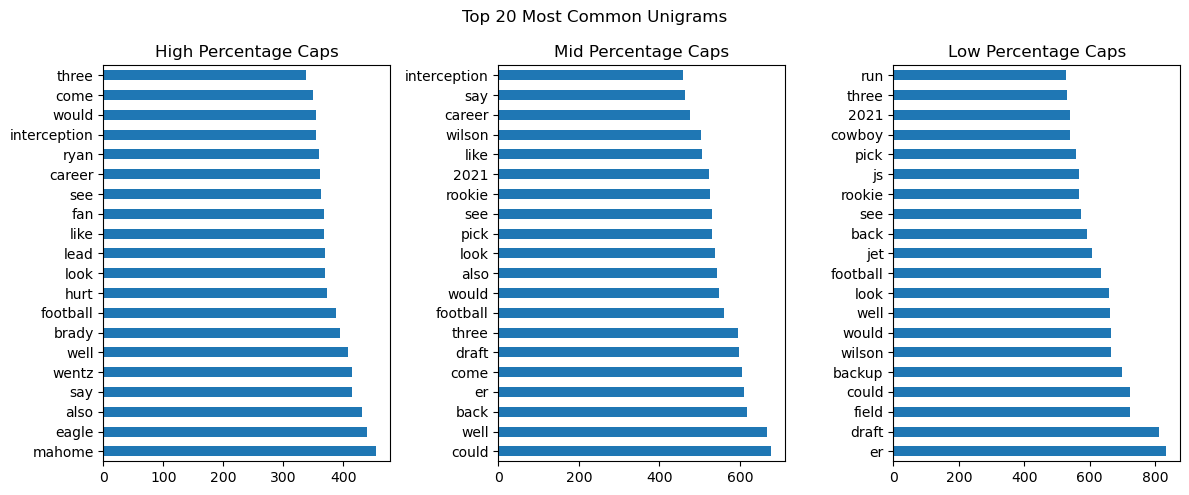

In [27]:
#Unigram visualizations

wran.viz_unigrams(unigram_high_words, unigram_mid_words, unigram_low_words)

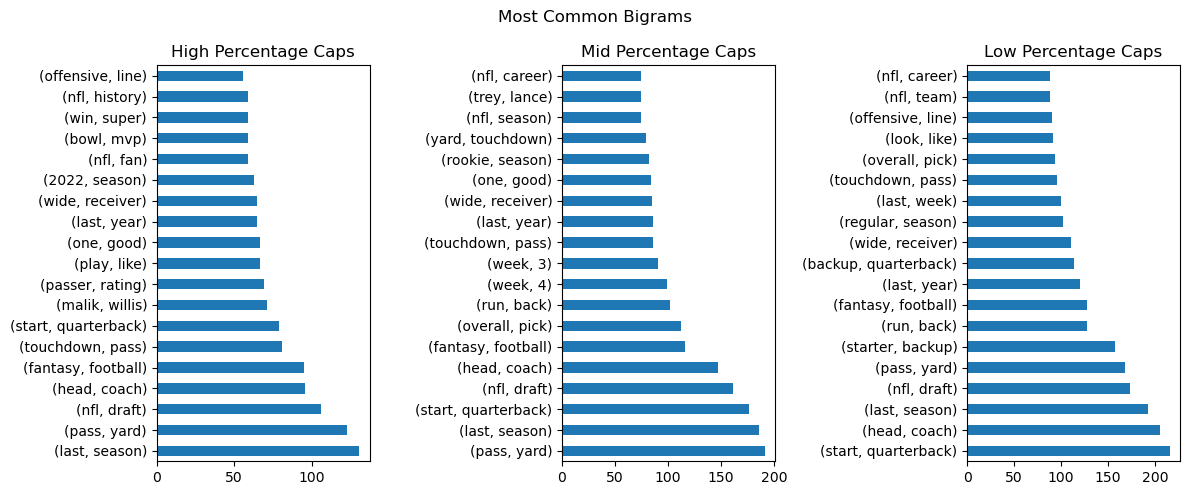

In [28]:
#Bigram visualizations

wran.viz_bigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

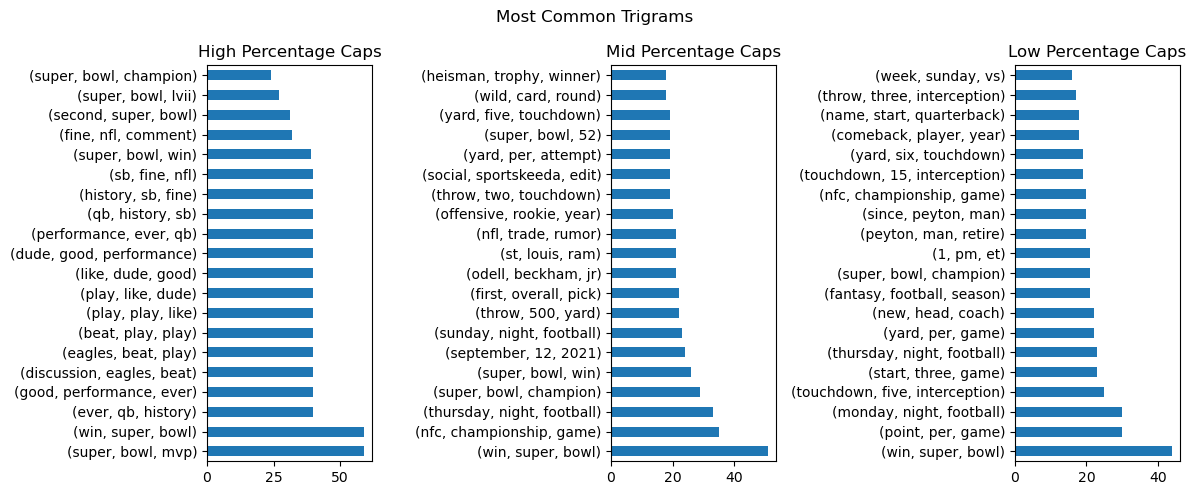

In [29]:
#Trigram visualizations

wran.viz_trigrams(bi_tri_high_words, bi_tri_mid_words, bi_tri_low_words)

### Sentiment Analysis

In [30]:
#Get Sentiment Scores

wran.get_sia_scores(comm)

year  percent_of_cap  sentiment
tier                                        
high  2020.000000       18.765000   0.999895
low   2019.676471        1.008824   0.913597
mid   2019.880000        5.800000   0.999960

### Key Findings

- 'Career' is not mentioned in low-percentage caps.
- High-percentage caps have a larger set of unique words. A lot of them could be comparisons to "the Greats" (Mahomes, Hurts, Wentz, Brady).
- Low-percentage caps talked a lot about backup (presumably quarterbacks), field, and run. Mention of "Jets" indicate historically low-percentage cap quarterbacks.
- The conversation always revolves around winning the Super Bowl across all three cap tiers.
- High-percentage caps talk about the Super Bowl and their performance in it significantly more. The focus of mid and low percentage caps also speak about their performance in the NFC.
- Sentiment scores are very high, if not maxed out, across all tiers. Only the low-percentage cap quarterbacks had a slightly lower score.

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback